##        Surya Narayan Sharma


### Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


## Prediction using Unsupervised ML


Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

# Importing Libraries

In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans


In [ ]:
#loading and reading the dataset
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data = iris.data,columns= iris.feature_names)
data_target = pd.DataFrame(data = iris.target, columns = ['Species'])

df = pd.concat([data,data_target], sort = False, axis = 1)
df['Species'] = df['Species'].replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#representing the dimensionality of the DataFrame.
df.shape

(150, 5)

In [ ]:
#checking for any null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#checking for any null values in the dataset
df.isna().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

#### No null values were found in the dataset.

In [ ]:
#mathematical information about the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualizing the relationships between each variable.

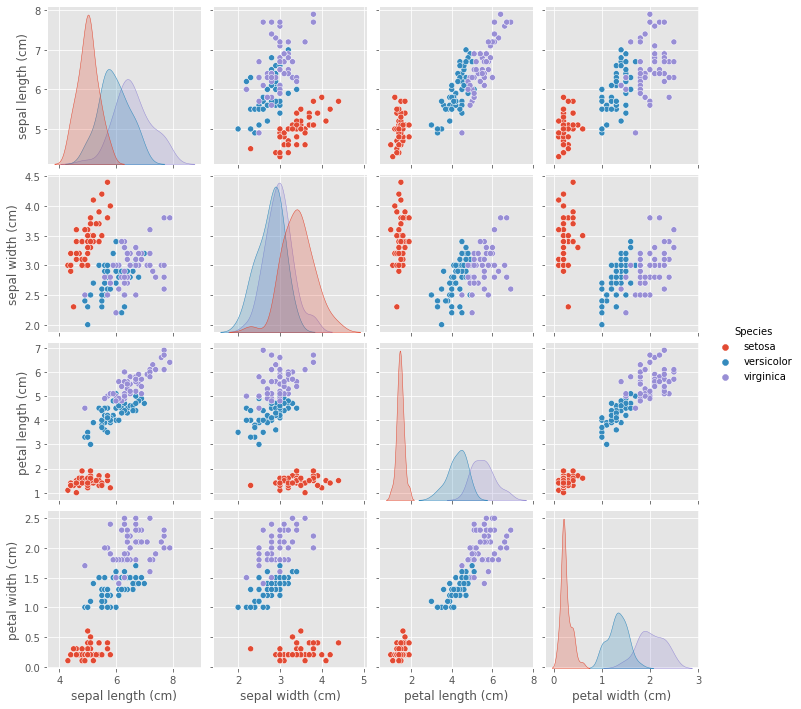

In [ ]:
sns.pairplot(df,hue="Species")

# Preprocessing the Data

In [ ]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
ind_attributes=['sepal length (cm)','sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

In [ ]:
data_target.columns

Index(['Species'], dtype='object')

In [ ]:
dep_attributes=['Species']

In [ ]:
ind_pipeline=Pipeline([('std_scaler', StandardScaler()),])
dep_pipeline=Pipeline([("one_hot_enc",OneHotEncoder()),])
full_pipeline=ColumnTransformer([
    ("num",ind_pipeline,ind_attributes),
    ("cat",dep_pipeline,dep_attributes)
])
iris_encoded=full_pipeline.fit_transform(df)

# Predicting the optimum number of Clusters

#### The Elbow Method : for determining the optimal value of k

Text(0, 0.5, 'WCSS')

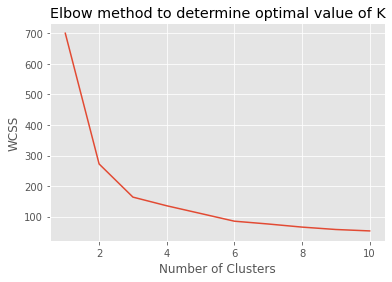

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=24)
  kmeans.fit(iris_encoded)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method to determine optimal value of K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 
This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=24)
cluster_no=kmeans.fit_predict(iris_encoded)
cluster_no

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# Visualizing the Clusters

Sepal Length vs Sepal Width Graph

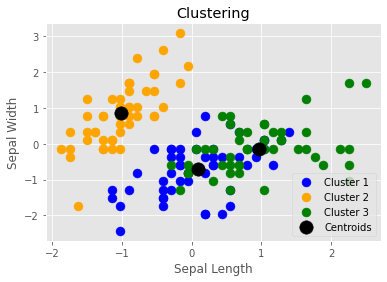

In [ ]:
plt.scatter(iris_encoded[cluster_no == 0, 0], iris_encoded[cluster_no == 0, 1], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 0], iris_encoded[cluster_no == 1, 1], s = 80, c = 'orange', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 0], iris_encoded[cluster_no == 2, 1], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 180, c = 'black', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Petal Length vs Petal Width Graph

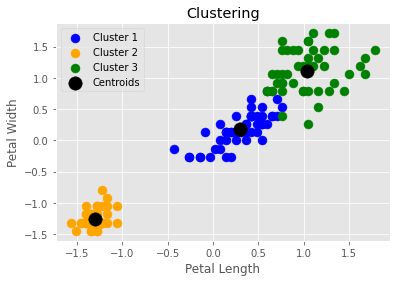

In [ ]:
plt.scatter(iris_encoded[cluster_no == 0, 2], iris_encoded[cluster_no == 0, 3], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 2], iris_encoded[cluster_no == 1, 3], s = 80, c = 'orange', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 2], iris_encoded[cluster_no == 2, 3], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 180, c = 'black', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


Sepal Length vs Petal Length Graph

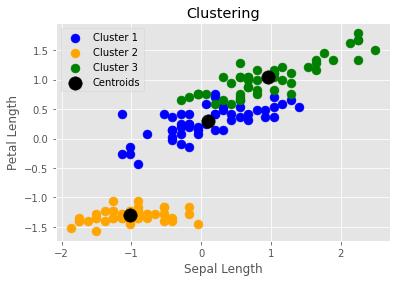

In [ ]:
plt.scatter(iris_encoded[cluster_no == 0, 0], iris_encoded[cluster_no == 0, 2], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 0], iris_encoded[cluster_no == 1, 2], s = 80, c = 'orange', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 0], iris_encoded[cluster_no == 2, 2], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 180, c = 'black', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

Sepal Width vs Petal Length Graph

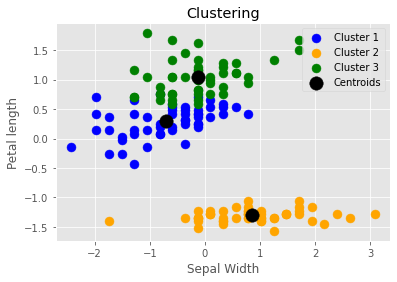

In [ ]:
plt.scatter(iris_encoded[cluster_no == 0, 1], iris_encoded[cluster_no == 0, 2], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 1], iris_encoded[cluster_no == 1, 2], s = 80, c = 'orange', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 1], iris_encoded[cluster_no == 2, 2], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 180, c = 'black', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Sepal Width')
plt.ylabel('Petal length')
plt.legend()
plt.show()

Sepal Width vs Petal Width Graph

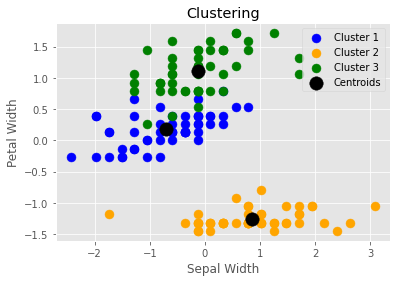

In [ ]:
plt.scatter(iris_encoded[cluster_no == 0, 1], iris_encoded[cluster_no == 0, 3], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 1], iris_encoded[cluster_no == 1, 3], s = 80, c = 'orange', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 1], iris_encoded[cluster_no == 2, 3], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s = 180, c = 'black', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()